In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [3]:
data=pd.read_csv("exchange_rate.csv")
data

,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


In [4]:
data.head(31)

,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849
5,06-01-1990 00:00,0.7866
6,07-01-1990 00:00,0.7886
7,08-01-1990 00:00,0.7910
8,09-01-1990 00:00,0.7939
9,10-01-1990 00:00,0.7894


In [5]:
data.tail(32)

,date,Ex_rate
7556,09-09-2010 00:00,0.741125
7557,10-09-2010 00:00,0.744546
7558,11-09-2010 00:00,0.745796
7559,12-09-2010 00:00,0.745045
7560,13-09-2010 00:00,0.747692
7561,14-09-2010 00:00,0.745601
7562,15-09-2010 00:00,0.747680
7563,16-09-2010 00:00,0.744602
7564,17-09-2010 00:00,0.744158
7565,18-09-2010 00:00,0.745184


# Data from 1 january 1990 to 10 October 2010

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     7588 non-null   object 
 1   Ex_rate  7588 non-null   float64
dtypes: float64(1), object(1)
memory usage: 118.7+ KB


In [8]:
data.isnull().sum()

date       0
Ex_rate    0
dtype: int64

# No null values

In [10]:
data[data.duplicated(keep=False)]

,date,Ex_rate


In [11]:
data.duplicated().sum()

0

# No Duplicate rows

# Parsing the data Columns

In [14]:
data['date']=pd.to_datetime(data['date'],format='mixed')

In [15]:
data.head()

,date,Ex_rate
0,1990-01-01,0.7855
1,1990-02-01,0.7818
2,1990-03-01,0.7867
3,1990-04-01,0.7860
4,1990-05-01,0.7849


In [16]:
data.tail()

,date,Ex_rate
7583,2010-06-10,0.718494
7584,2010-07-10,0.721839
7585,2010-08-10,0.723197
7586,2010-09-10,0.720825
7587,2010-10-10,0.720825


<Axes: >

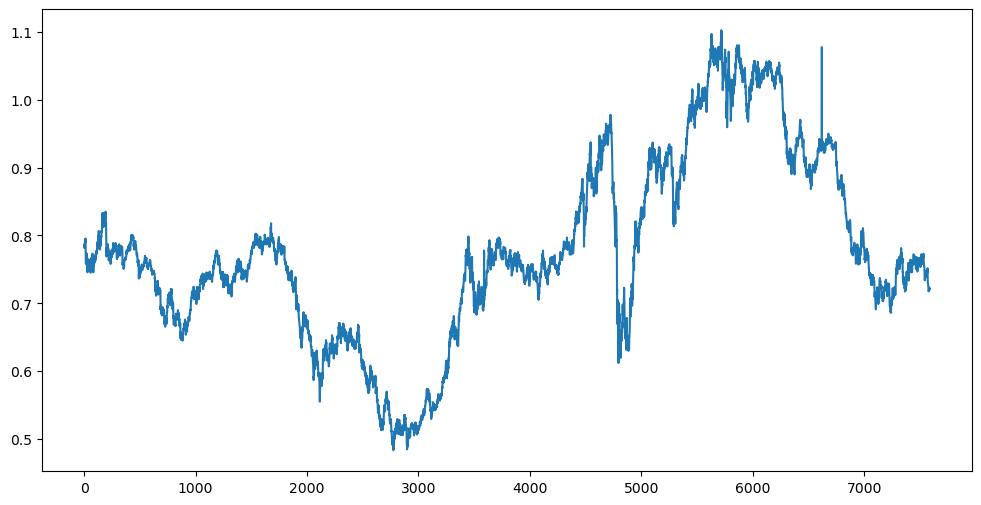

In [17]:
data['Ex_rate'].plot(figsize=(12,6))

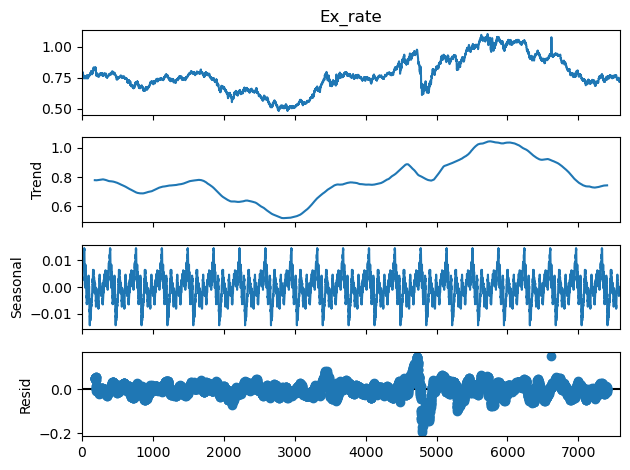

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose=seasonal_decompose(data['Ex_rate'],model='additive',period=365)
decompose.plot()
plt.show()

<Axes: >

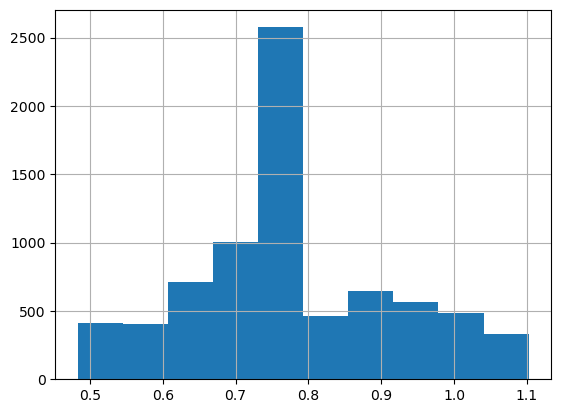

In [19]:
data['Ex_rate'].hist()

<Axes: xlabel='Ex_rate', ylabel='Density'>

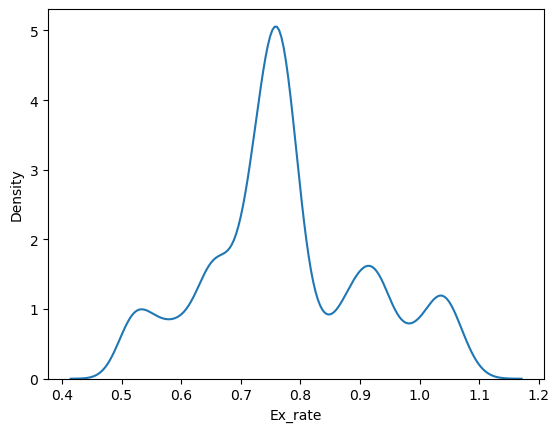

In [20]:
sns.kdeplot(data['Ex_rate'])

<Axes: ylabel='Ex_rate'>

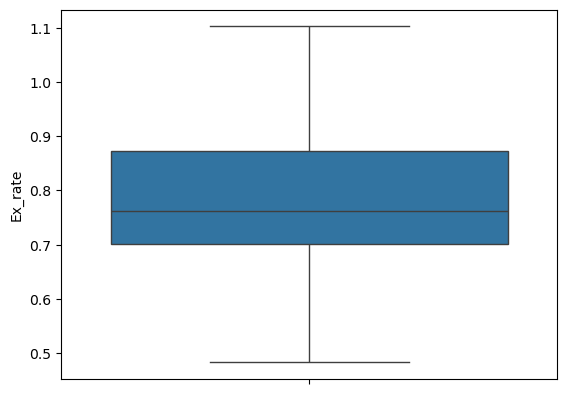

In [21]:
sns.boxplot(data['Ex_rate'])

In [22]:
# Model Building - ARIMA

In [23]:
import statsmodels.graphics.tsaplots as tsa_plots

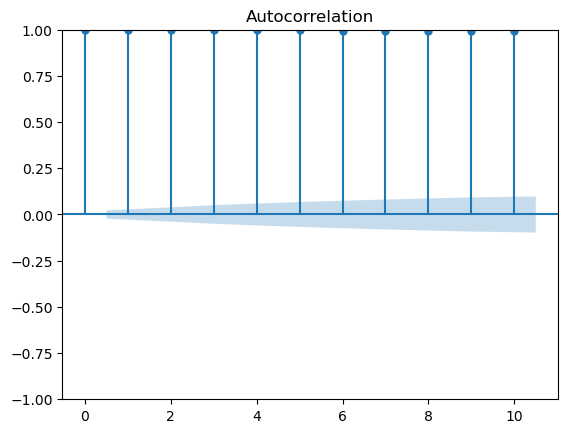

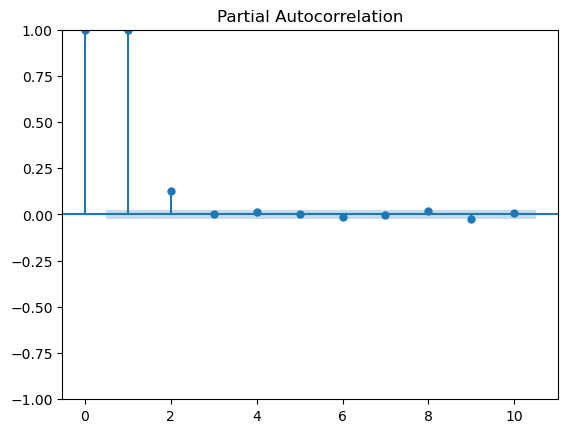

In [24]:
tsa_plots.plot_acf(data["Ex_rate"],lags=10)
tsa_plots.plot_pacf(data["Ex_rate"],lags=10)
plt.show()

From the above acf and pacf plots, by the principle of parsimony we can go for p=1 and q=1 (The simpler the better)

In [26]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, root_mean_squared_error

# Splitting the data

In [28]:
train_data=data.iloc[:-365]
test_data=data.iloc[-365:]

In [29]:
train_data.shape,test_data.shape

((7223, 2), (365, 2))

In [30]:
train_data.tail()

,date,Ex_rate
7218,2009-06-10,0.726111
7219,2009-07-10,0.729235
7220,2009-08-10,0.728412
7221,2009-09-10,0.728306
7222,2009-10-10,0.728491


In [31]:
test_data.head()

,date,Ex_rate
7223,2009-11-10,0.728491
7224,2009-12-10,0.728491
7225,2009-10-13,0.716281
7226,2009-10-14,0.714847
7227,2009-10-15,0.706964


In [32]:
p=1
d=1
q=1
order=(p,d,q)

In [33]:
model=ARIMA(train_data['Ex_rate'].values,order=order)

In [34]:
model=model.fit()

In [35]:
residuals=model.resid

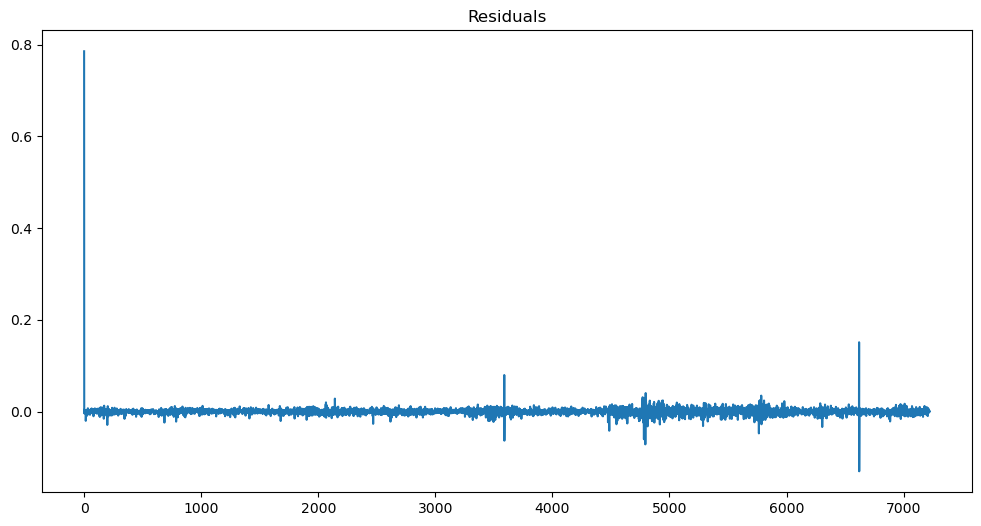

In [36]:
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title('Residuals')
plt.show()

# Forecasting using The Model

In [38]:
arima_forecasts = model.forecast(steps=365)

In [39]:
arima_forecasts

array([0.72846666, 0.7284696 , 0.72846925, 0.72846929, 0.72846928,
       0.72846928, 0.72846928, 0.72846928, 0.72846928, 0.72846928,
       0.72846928, 0.72846928, 0.72846928, 0.72846928, 0.72846928,
       0.72846928, 0.72846928, 0.72846928, 0.72846928, 0.72846928,
       0.72846928, 0.72846928, 0.72846928, 0.72846928, 0.72846928,
       0.72846928, 0.72846928, 0.72846928, 0.72846928, 0.72846928,
       0.72846928, 0.72846928, 0.72846928, 0.72846928, 0.72846928,
       0.72846928, 0.72846928, 0.72846928, 0.72846928, 0.72846928,
       0.72846928, 0.72846928, 0.72846928, 0.72846928, 0.72846928,
       0.72846928, 0.72846928, 0.72846928, 0.72846928, 0.72846928,
       0.72846928, 0.72846928, 0.72846928, 0.72846928, 0.72846928,
       0.72846928, 0.72846928, 0.72846928, 0.72846928, 0.72846928,
       0.72846928, 0.72846928, 0.72846928, 0.72846928, 0.72846928,
       0.72846928, 0.72846928, 0.72846928, 0.72846928, 0.72846928,
       0.72846928, 0.72846928, 0.72846928, 0.72846928, 0.72846

In [40]:
error = mean_absolute_percentage_error(test_data['Ex_rate'].values,arima_forecasts)

error

0.031223571204148145

<Axes: >

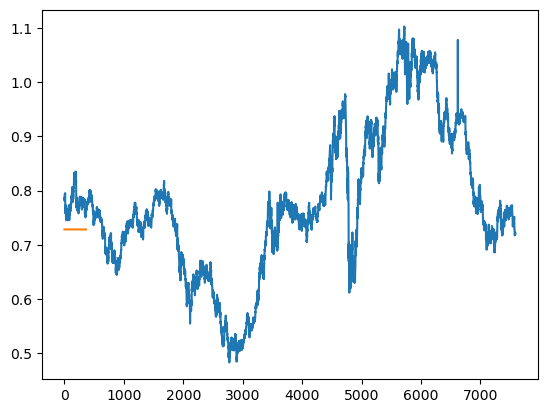

In [41]:
data['Ex_rate'].plot()
pd.Series(arima_forecasts).plot()

# Model Building - Exponenntial Smoothing

In [43]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [44]:
train_data.shape,test_data.shape

((7223, 2), (365, 2))

# Simple Exponential Smoothing

In [46]:
ses_model = SimpleExpSmoothing(train_data['Ex_rate']).fit()

preds_ses = ses_model.predict(start= test_data.index[0] , end = test_data.index[-1])

mean_absolute_percentage_error(preds_ses,test_data['Ex_rate'])

0.032104988477171234

# Holts Exponential Smoothing

In [48]:
hle_model = Holt(train_data['Ex_rate']).fit()

preds_hle = hle_model.predict(start = test_data.index[0] , end = test_data.index[-1])

mean_absolute_percentage_error(preds_hle,test_data['Ex_rate'])

0.047792853367783224

# Holt's winter exponential smoothing 

In [50]:
hwe_model = ExponentialSmoothing(train_data['Ex_rate'],trend='add',seasonal='add',seasonal_periods=365).fit()

preds_hwe = hwe_model.predict(start = test_data.index[0] , end = test_data.index[-1])

mean_absolute_percentage_error(preds_hwe,test_data['Ex_rate'])

C:\Users\Bavandla dileep\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


0.02682690571589099

# since Holt's winter exponential smoothing is giving less MAPE value this might suit the model 
# Now finding the optimal parameters for smoothing level components using grid search

In [52]:
smoothing_level = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

smoothing_trend = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

best_cfg = None
best_Mape = float('inf') 

for i in smoothing_level:
    for j in smoothing_trend:
        mape_scores = []
        hw_model = ExponentialSmoothing(train_data['Ex_rate'],seasonal_periods=12,
                                        seasonal='add',trend = 'add').fit(smoothing_level = i,smoothing_trend=j)
        preds = hw_model.predict(start=test_data.index[0] ,end=test_data.index[-1])
        
        Mape = mean_absolute_percentage_error(test_data['Ex_rate'],preds)
        
        if Mape<best_Mape:
            best_Mape = Mape
            best_cfg = (i,j)
            
print('Best Mape value is:',best_Mape)
print('Best configuration is:',best_cfg)

Best Mape value is: 0.021396184372388268
Best configuration is: (0.2, 0.5)


In [53]:
hwe_model = ExponentialSmoothing(train_data['Ex_rate'],
                                 seasonal='add',trend='add',seasonal_periods=12).fit(smoothing_level=0.2,smoothing_trend=0.5)

preds_hle = hle_model.predict(start = test_data.index[0] , end = test_data.index[-1])

mean_absolute_percentage_error(preds_hle,test_data['Ex_rate'])

0.047792853367783224

In [54]:
# Fitting the Holt's Linear exponential model with optimal parameters

holt_winter = ExponentialSmoothing(data['Ex_rate'],
                                 seasonal='add',trend='add',seasonal_periods=12).fit(smoothing_level = 0.2,smoothing_trend= 0.5)

In [55]:
# Forecasting feature values

forecasts = holt_winter.forecast(steps = 365)

<Axes: >

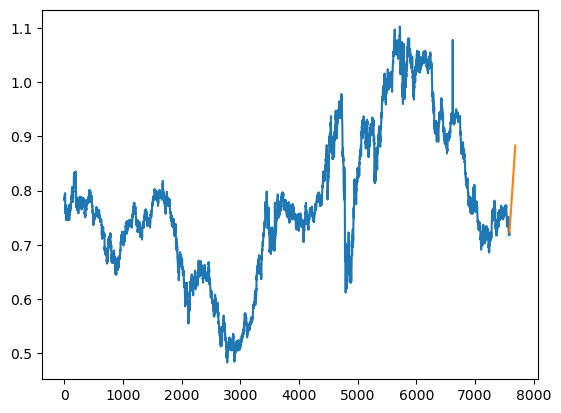

In [56]:
# comparison of actual and forecasted values

data['Ex_rate'].plot()
pd.Series(forecasts[:100]).plot()

### Evaluation and Comparison

**Compute Error Metrics**

In [59]:
MAE = mean_absolute_error(forecasts,arima_forecasts)

print('Mean Absolute Error is:',MAE)

Mean Absolute Error is: 0.2883659306410062


In [60]:
RMSE = root_mean_squared_error(forecasts,arima_forecasts)

print('Root Mean Square Error is:',RMSE)

Root Mean Square Error is: 0.3346988395796632


In [61]:
MAPE = mean_absolute_percentage_error(forecasts,arima_forecasts)

print('Mean Absolute Percentage Error is:',MAPE)

Mean Absolute Percentage Error is: 0.26253038372000576


**Model Comparsion:**

Based on the evaluation metric(Mean Absolute percentage error) and the visualisation obtained we can say that the Exponential smoothing has performed well when compared to ARIMA model. (especially Holt's winter exponential smoothing has done well) to capture the trend in our data when compared to the ARIMA model.

# conclusion


Holt-Winters’ Exponential Smoothing was a strong choice for the data. However, in this dataset, the seasonal component appeared weak or non-existent. It did not yield significantly better results than Holt's linear model, and in some cases, it could have led to overfitting.

ARIMA gave a good approach by modeling both short-term and long-term dependencies in the data. While ARIMA is powerful for time series with autoregressive or moving average components, it did not outperform Holt's model in this particular dataset but in this case, the linear trend was better modeled by Holt’s method.